# Exploratory Data Analysis on a Dataset

#### importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the CSV Files

In [2]:
EDA_data=pd.read_csv('Cardiotocographic.csv')
EDA_data.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


#### Handling missing values

In [3]:
# checking for missing values
EDA_data.isnull().sum()

,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


In [4]:
EDA_data.fillna(EDA_data.mean(numeric_only=True), inplace=True)
EDA_data.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


#### Identifying and correct any inconsistencies in data types

In [5]:
EDA_data.dtypes

,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


-> Since all variables were already in numerical i.e float64 format. There are no data type inconsistencies were found. So no conversion is required.

In [12]:
EDA_data.isnull().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


#### Detecting and treating outliers if necessary

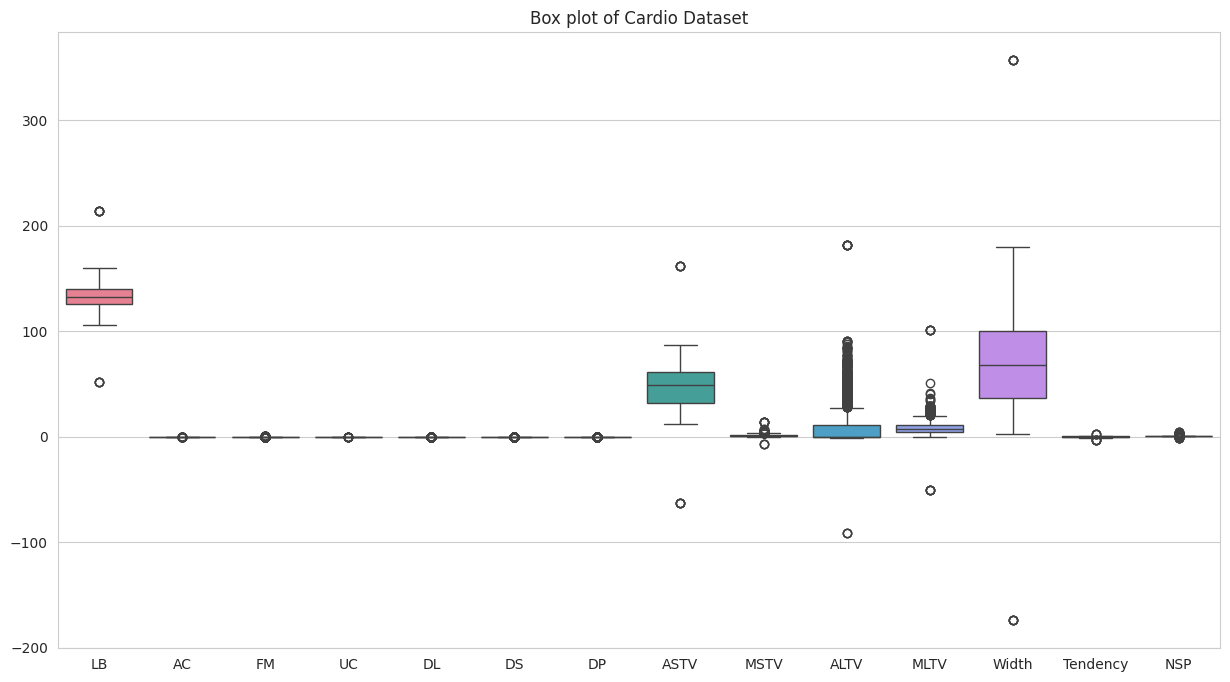

In [17]:
# outlier detection using boxplot
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.boxplot(data=EDA_data)
plt.title('Box plot of Cardio Dataset')
plt.show()

In [18]:
# outlier treatment
def remove_outlier(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3 - Q1
  return data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
df_no_outlier=remove_outlier(EDA_data)
df_no_outlier.shape

(883, 14)

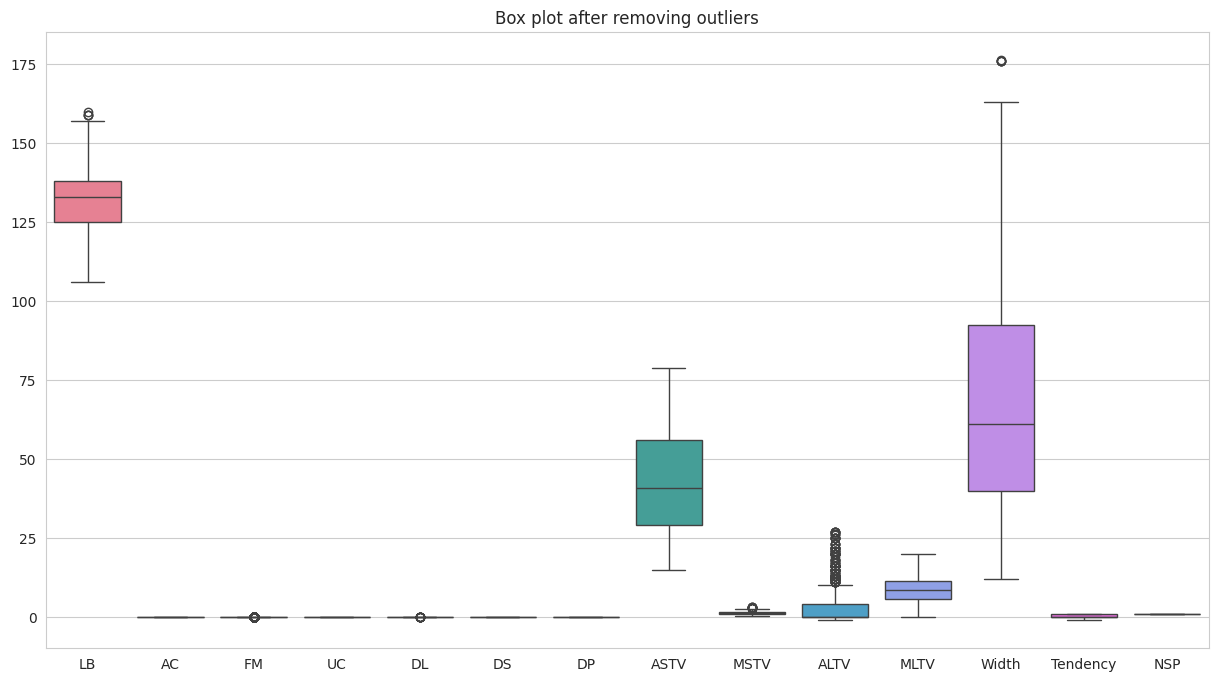

In [20]:
# boxplot after removing outliers
sns.set_style('whitegrid')
plt.figure(figsize=(15,8))
sns.boxplot(data=df_no_outlier)
plt.title('Box plot after removing outliers')
plt.show()

### 2. Statistical Summary

In [21]:
#statistical summary using describe() method
EDA_data.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.214328,0.004370,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734356,42.719161,0.642424,0.641426
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001668,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.500000,68.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [22]:
#finding central tendency(mean, median) and dispersion(standard deviation, IQR)
summary_stats= pd.DataFrame({
    'Mean': EDA_data.mean(),
    'Median': EDA_data.median(),
    'Standard Deviation': EDA_data.std(),
    'IQR': EDA_data.quantile(0.75) - EDA_data.quantile(0.25)
})
summary_stats

,Mean,Median,Standard Deviation,IQR
LB,133.343598,133.000000,11.214328,14.000000
AC,0.003219,0.001668,0.004370,0.005606
FM,0.009894,0.000000,0.067540,0.002567
UC,0.004391,0.004484,0.003340,0.004685
DL,0.001895,0.000000,0.003343,0.003289
DS,0.000003,0.000000,0.000141,0.000000
DP,0.000175,0.000000,0.000836,0.000000
ASTV,46.995984,49.000000,18.813973,29.000000
MSTV,1.364378,1.200000,1.173632,1.000000
ALTV,10.285964,0.000000,21.205041,11.000000


-> The dataset is highly heterogeneous, with many variables showing skewness and zero-inflation, which is typical in cardiotocographic data. Variability-based features (ASTV, ALTV, MLTV) appear particularly informative for distinguishing normal and abnormal fetal conditions.

### 3. Data Visualization

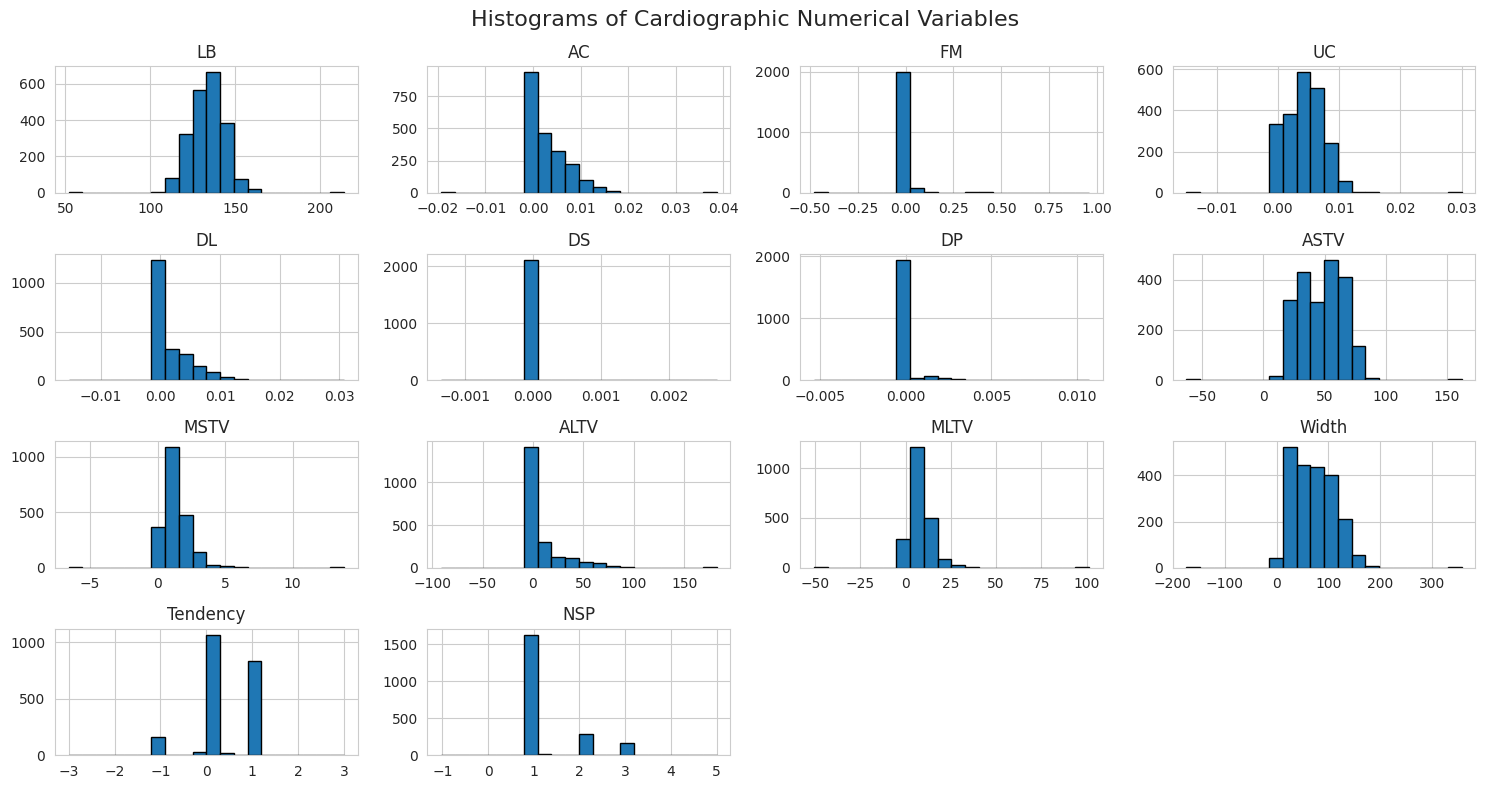

In [25]:
#creating histograms for numerical columns
sns.set_style('whitegrid')
EDA_data.hist(figsize=(15,8), bins=20, edgecolor='black')
plt.suptitle('Histograms of Cardiographic Numerical Variables', fontsize=16)
plt.tight_layout()
plt.show()

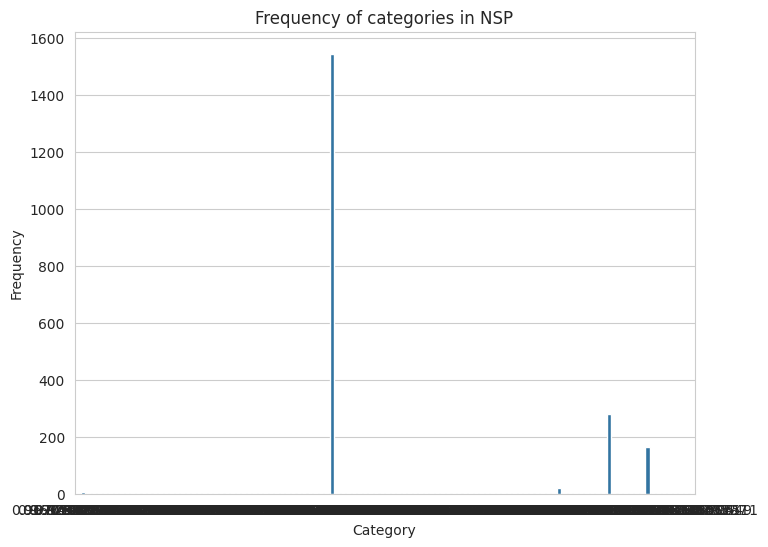

In [27]:
# bar charts to display the frequency of categories for categorical variables.
cat_counts=EDA_data['NSP'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=cat_counts.index, y=cat_counts.values)
plt.title('Frequency of categories in NSP')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.show()

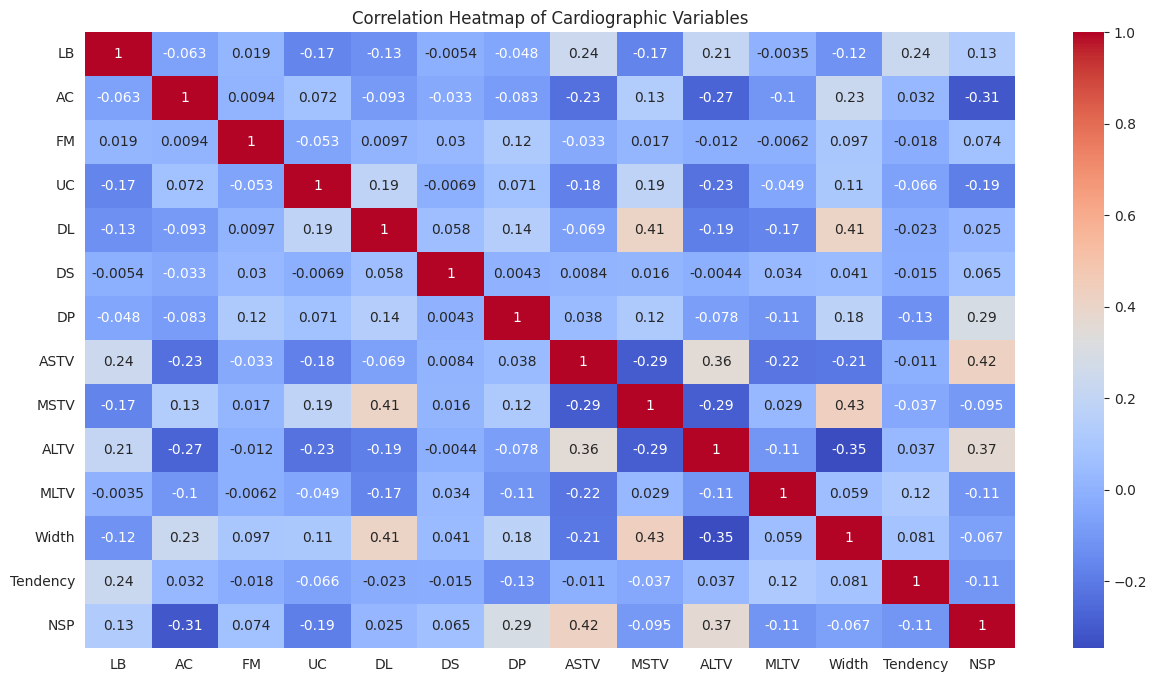

In [30]:
#	Generating correlation heatmaps to explore relationships between pairs of variables.
plt.figure(figsize=(15,8))
sns.heatmap(EDA_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Cardiographic Variables')
plt.show()

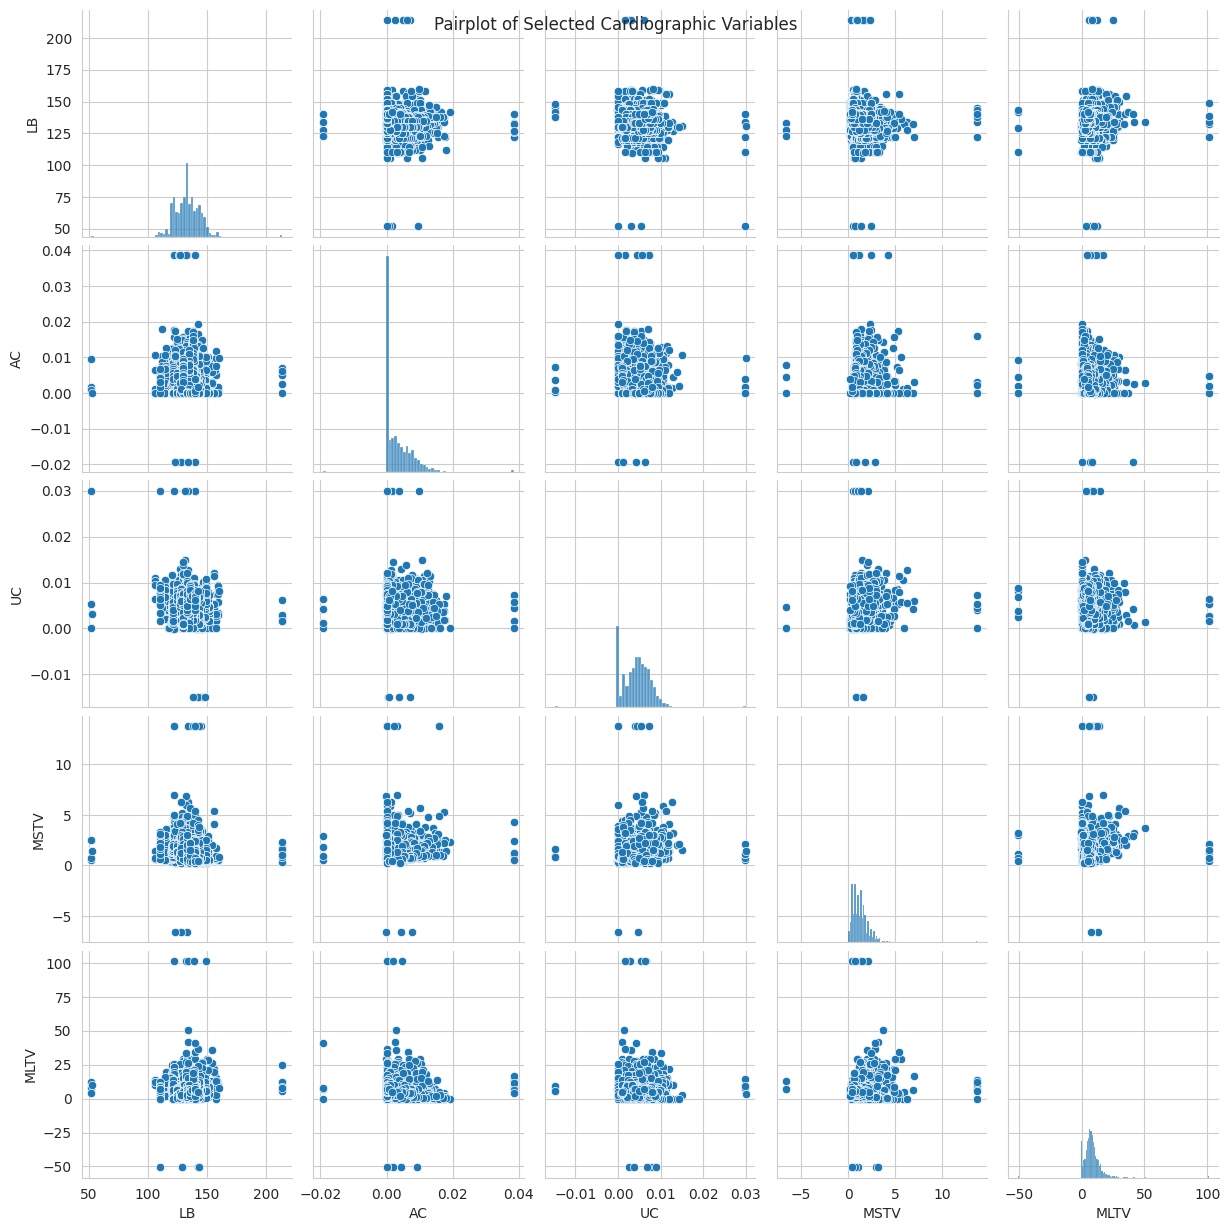

In [33]:
# Advanced visualization technique - pairplot
sel_cols=['LB', 'AC', 'UC', 'MSTV', 'MLTV']
sns.pairplot(EDA_data[sel_cols])
plt.suptitle('Pairplot of Selected Cardiographic Variables')
plt.show()

### 4. Pattern Recognition and Insights



*   MSTV and MLTV show a positive correlation.
*   ASTV and MSTV show a negative correlation.


*   ALTV and MLTV are negatively correlated.
*   LB has weak correlation with most variables.





In [35]:
# checking if temporal data is available
EDA_data.columns

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')



*   Since no temporal variable (such as time, date, or sequence index) is present, time-based trend analysis cannot be performed directly.
*   Therefore, trends over time cannot be identified in this dataset.



### 5. Conclusion

The exploratory data analysis of the cardiographic dataset shows that most variables are numerical, with NSP as the only categorical feature representing fetal health status. Baseline fetal heart rate (LB) is relatively stable and weakly related to other variables, making it insufficient on its own for assessing fetal condition. In contrast, variability-related features (MSTV, MLTV, ASTV, ALTV) are strongly informative and closely linked to fetal well-being. Accelerations, fetal movements, and decelerations are infrequent but clinically important when present. Outliers were handled appropriately, and since no temporal data is available, the analysis focused on cross-sectional patterns. Overall, fetal heart rate variability measures are more critical than baseline heart rate for evaluating fetal health and guiding further analysis.